In [1]:
#install.packages("psych")
#install.packages("gpairs")
#install.packages("gplots")
#install.packages("coefplot")
#install.packages("car")
#install.packages("corrplot")
#install.packages("alr3")
#install.packaged("MASS")
#install.packages("mlogit")
library(MASS)
library(alr3)
require(car)
require("psych")
require(gpairs)
require(corrplot)
require(gplots)
require(coefplot)


Loading required package: car

Attaching package: 'alr3'

The following object is masked from 'package:MASS':

    forbes

Loading required package: psych

Attaching package: 'psych'

The following object is masked from 'package:alr3':

    heights

The following object is masked from 'package:car':

    logit

Loading required package: gpairs
Loading required package: corrplot
Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess

Loading required package: coefplot
Loading required package: ggplot2

Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha



In [2]:
setwd("C:\\Users\\armop\\Dropbox\\PHD\\Teaching\\AGBU505\\2019\\Lecture1") ##Start by defining directory
df=read.table("amus_park.csv",sep=",",header=TRUE)

After loading the data start the usual procedure to check the correctness of the loaded data. Check whether the loaded data has correct dimensions, print the first and last few observations.

In [3]:
dim(df)

[1] 500   8

In [4]:
head(df)

weekend,num.child,distance,rides,games,wait,clean,overall
yes,0,114.64826,82,68,64,86,49
yes,2,27.01410,82,73,80,84,68
no,1,63.30098,79,75,74,86,62
yes,0,25.90993,82,68,69,87,38
no,4,54.71831,78,83,78,84,69
no,5,22.67934,76,75,51,77,29


In [5]:
tail(df)

,weekend,num.child,distance,rides,games,wait,clean,overall
495,no,5,41.47010,78,80,80,87,57
496,no,0,11.05258,85,67,72,87,48
497,yes,0,8.18774,86,79,85,89,48
498,no,2,45.17740,90,88,89,91,74
499,no,3,27.08838,78,79,84,86,57
500,no,1,38.40876,81,84,81,83,65


Check for NAN or missing values

In [6]:
sum(is.na(df)) #Check for NAN or missing values

[1] 0

It is good idea to summerize your data and investigate it.

In [7]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
weekend*,1,500,1.48200,0.5001763,1.00000,1.47750,0.00000,1.0000000,2.0000,1.0000,0.071830669,-1.9988260,0.02236857
num.child,2,500,1.73800,1.4959384,2.00000,1.61000,1.48260,0.0000000,5.0000,5.0000,0.437142150,-0.7509303,0.06690040
distance,3,500,31.04751,33.1454452,19.01909,24.64603,17.25512,0.5267228,239.1921,238.6654,2.574233780,8.9959900,1.48230937
rides,4,500,80.38200,5.4150458,80.00000,80.35250,5.93040,67.0000000,94.0000,27.0000,0.060117097,-0.4848875,0.24216821
games,5,500,74.14400,8.1249797,74.00000,74.20000,8.89560,52.0000000,96.0000,44.0000,-0.049533738,-0.3451199,0.36336014
wait,6,500,73.41600,10.7518439,74.00000,73.50500,11.86080,43.0000000,103.0000,60.0000,-0.075266072,-0.2293318,0.48083708
clean,7,500,85.39200,5.1333262,85.00000,85.38750,5.93040,72.0000000,98.0000,26.0000,0.008375348,-0.4473279,0.22956933
overall,8,500,52.87200,16.0763339,52.00000,52.51000,16.30860,6.0000000,102.0000,96.0000,0.196187378,-0.1597183,0.71895551


or you can use different command

In [8]:
summary(df)

 weekend     num.child        distance            rides           games      
 no :259   Min.   :0.000   Min.   :  0.5267   Min.   :67.00   Min.   :52.00  
 yes:241   1st Qu.:0.000   1st Qu.: 10.3181   1st Qu.:77.00   1st Qu.:68.00  
           Median :2.000   Median : 19.0191   Median :80.00   Median :74.00  
           Mean   :1.738   Mean   : 31.0475   Mean   :80.38   Mean   :74.14  
           3rd Qu.:3.000   3rd Qu.: 39.5821   3rd Qu.:84.00   3rd Qu.:80.00  
           Max.   :5.000   Max.   :239.1921   Max.   :94.00   Max.   :96.00  
      wait            clean          overall      
 Min.   : 43.00   Min.   :72.00   Min.   :  6.00  
 1st Qu.: 65.75   1st Qu.:82.00   1st Qu.: 41.75  
 Median : 74.00   Median :85.00   Median : 52.00  
 Mean   : 73.42   Mean   :85.39   Mean   : 52.87  
 3rd Qu.: 81.00   3rd Qu.:89.00   3rd Qu.: 63.00  
 Max.   :103.00   Max.   :98.00   Max.   :102.00  

For summerizing discrete data use function *table()*

In [9]:
table(df$weekend) #for discrete data


 no yes 
259 241 

Before modeling, there are two important things to check: that each individual variable
has a reasonable distribution, and that joint relationships among the variables
are appropriate for modeling. Start by visualizing data.

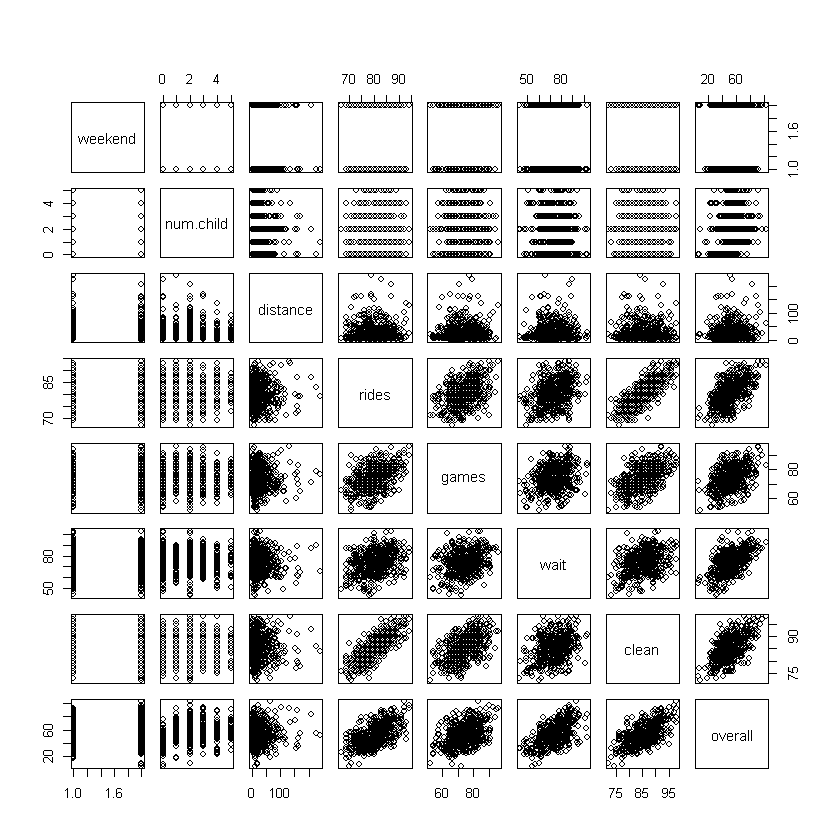

In [10]:
#Visualize the data
pairs(formula = ∼ weekend +  num.child + distance   +rides  + games + wait + clean
      + overall, data=df,main="")

Loading required package: grid
Loading required package: lattice


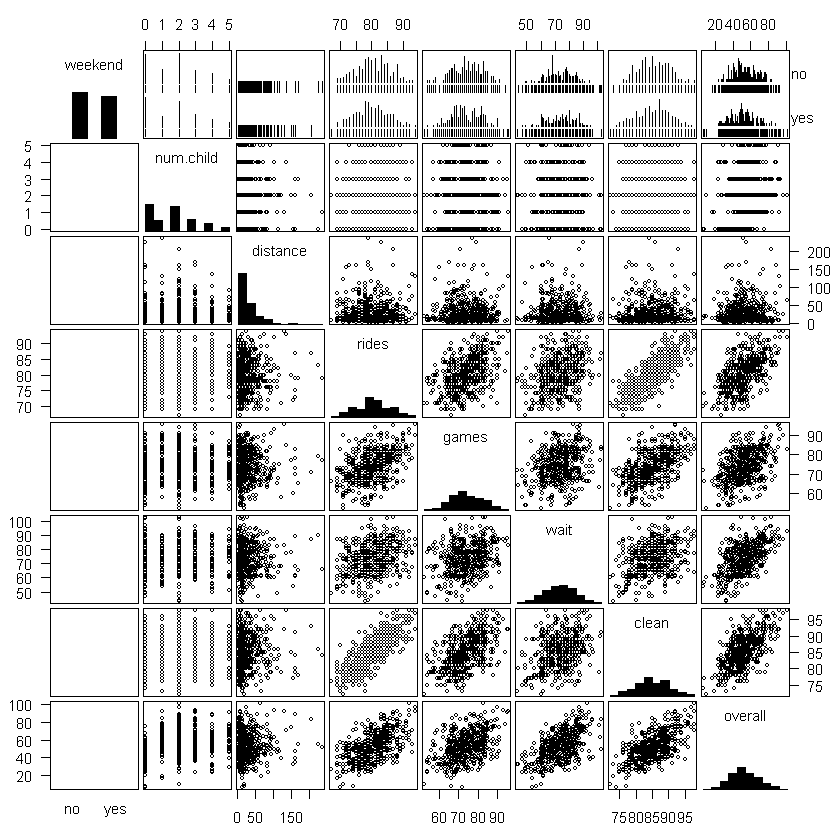

In [11]:
gpairs(df)

The difference of the above two function is on how they handle the discrete values. 

To check the relationships among variables, we examine the bivariate scatterplots
shown Figure above. They show few concerns apart from the need to transform
distance. For example, the pairwise scatterplots of our continuous measures are
generally elliptical in shape, which is a good indication that they are appropriate to
use in a linear model. One question, however, concerns the fact that the variables in
the lower right of figure are positively correlated.

In [12]:
df$logdist=log(df$distance)

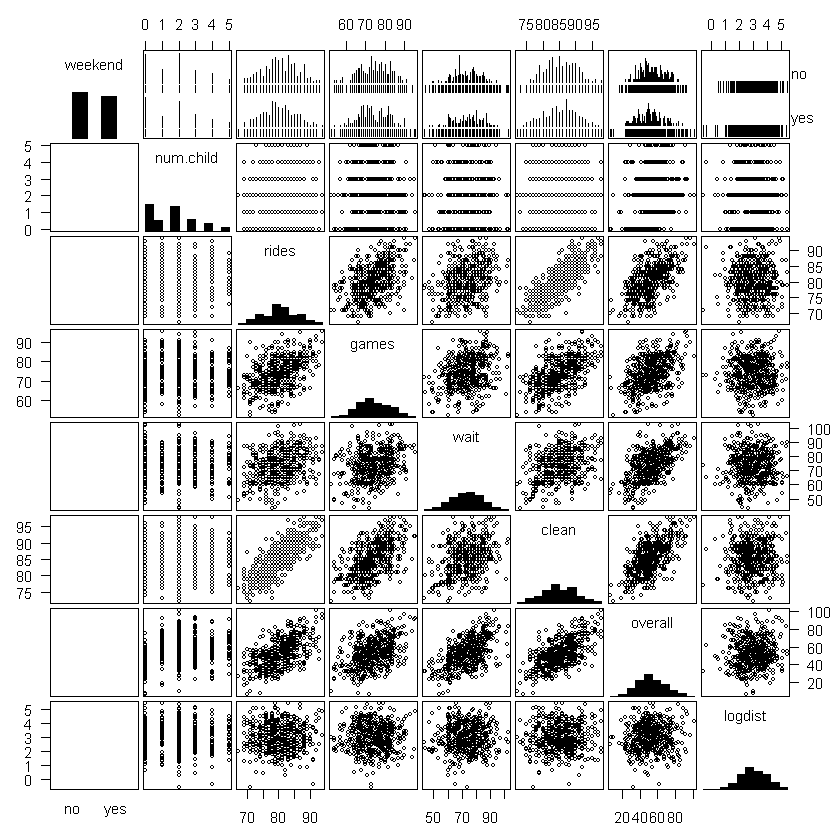

In [13]:
gpairs(df[,-3])

In [14]:
head(df)

weekend,num.child,distance,rides,games,wait,clean,overall,logdist
yes,0,114.64826,82,68,64,86,49,4.741869
yes,2,27.01410,82,73,80,84,68,3.296359
no,1,63.30098,79,75,74,86,62,4.147901
yes,0,25.90993,82,68,69,87,38,3.254626
no,4,54.71831,78,83,78,84,69,4.002198
no,5,22.67934,76,75,51,77,29,3.121454


Although scatterplots provide a lot of visual information, when there are more than
a few variables, it can be helpful to assess the relationship between each pair with a
single number.

In [15]:
cor(df[,2:8])

,num.child,distance,rides,games,wait,clean,overall
num.child,1.00000000,-0.012136454,-0.027697383,0.012343448,-0.020994861,-0.007998140,0.34242021
distance,-0.01213645,1.000000000,-0.008598235,-0.008036711,-0.005848262,0.002919032,0.08829766
rides,-0.02769738,-0.008598235,1.000000000,0.453413358,0.315824769,0.789004748,0.57772686
games,0.01234345,-0.008036711,0.453413358,1.000000000,0.299620997,0.516460748,0.43325421
wait,-0.02099486,-0.005848262,0.315824769,0.299620997,1.000000000,0.366849504,0.56539527
clean,-0.00799814,0.002919032,0.789004748,0.516460748,0.366849504,1.000000000,0.62814674
overall,0.34242021,0.088297655,0.577726856,0.433254206,0.565395275,0.628146742,1.00000000


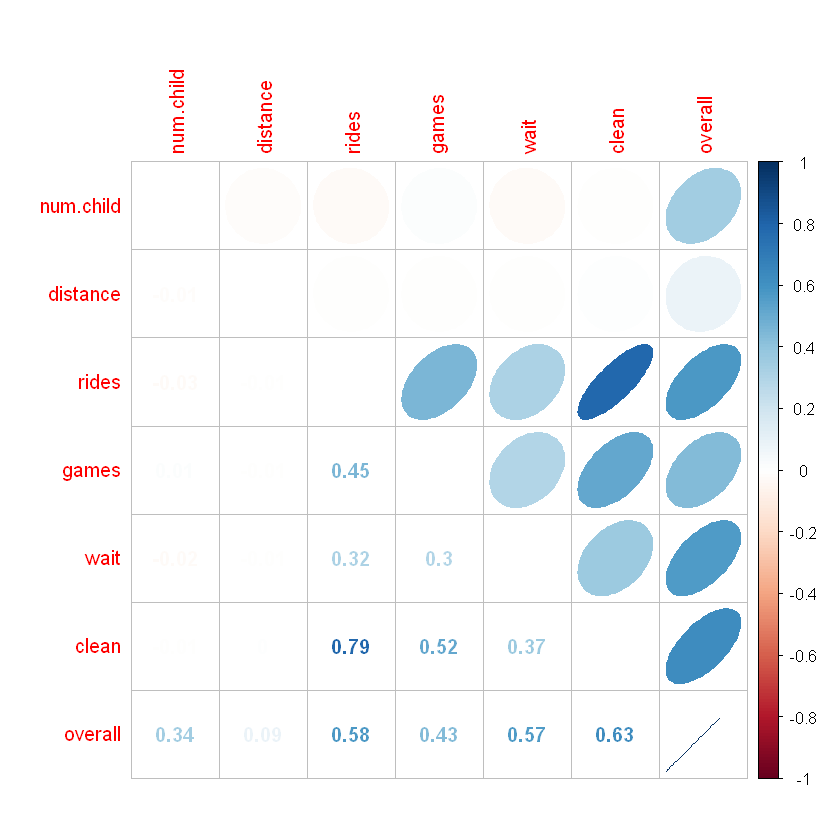

In [16]:
corrplot.mixed(corr=cor(df[ , 2:8], use="complete.obs"),upper="ellipse", tl.pos="lt")

A correlation plot produced using corrplot.mixed() from the corrplot package is an easy way to visualize all of the correlations in the data.  Numeric values of r are shown in the lower triangle of the matrix. The upper triangle displays ellipses (because we used the argument upper="ellipse"). These ellipses are tighter, progressively closer to being lines, for larger values of r, and are rounder, more like circles for r near zero. They are also shaded blue for positive direction, and red for negative (and show corresponding positive or negative slope).

Correlation coefficient r measures the linear association between two variables. If
the relationship between two variables is not linear, it would be misleading to interpret
r.

# Modeling

Now we are ready for model selection and validation process. We start with the Linear Model with a Single Predictor.

The goal of a satisfaction drivers analysis is to discover relationships between customers’
satisfaction with features of the service (or product) and their overall experience.
For example, to what extent is satisfaction with the park’s rides related to
overall experience? Is the relationship strong or weak?

Like most other R functions, *lm()* returns an object that we can save and use for
other purposes. Typically, we assign the result of *lm()* to an object that is used in
subsequent lines of code. For example, we can assign the result of *lm()* to a new
object *m1*:

In [17]:
m1=lm(overall ∼ rides, data=df)

In the output, R repeats the model for reference and reports
two coefficients, which are the intercept and the slope of the fitted line. Those
can be used to determine the best estimate for any respondent’s report of overall
based on knowing his or her value for rides. 

In [18]:
m1$coefficients

(Intercept)       rides 
 -84.996879    1.715171

In [19]:
typeof(m1$coefficients)

[1] "double"

For example, from this model we
would expect that a customer who gives a rating of 90 for satisfaction with rides
would give an overall rating of:

In [20]:
m1$coefficients[1]+m1$coefficients[2]*90

(Intercept) 
   69.36852

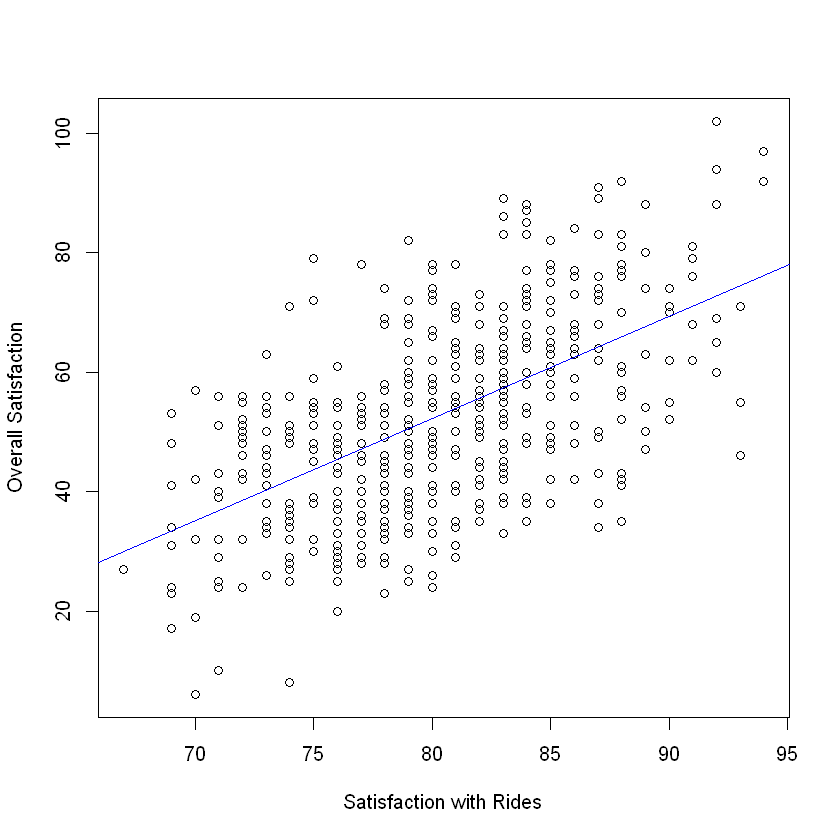

In [21]:
plot(overall ∼ rides, data=df,xlab="Satisfaction with Rides", ylab="Overall Satisfaction")
abline(m1, col="blue")

The result is shown in *abline()* recognizes that it is dealing with an lm
object and uses the slope and the intercept from m1 to draw the line.

If you want more details about output

In [22]:
summary(m1)


Call:
lm(formula = overall ~ rides, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.926 -10.358   0.635   8.964  35.359 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -84.9969     8.7483  -9.716   <2e-16 ***
rides         1.7152     0.1086  15.795   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.14 on 498 degrees of freedom
Multiple R-squared:  0.3338,	Adjusted R-squared:  0.3324 
F-statistic: 249.5 on 1 and 498 DF,  p-value: < 2.2e-16


In [23]:
t_value <- 1.7146/ 0.1085  
print(t_value)

[1] 15.80276


In [24]:
p_value<-1-pt(t_value, df=498)
print(p_value)

[1] 0


In [25]:
alpha=0.05
conf_int_l<-1.7146  -qt(alpha/2,498)*0.1085  
conf_int_u<-1.7146  + qt(alpha/2,498)*0.1085  
round(conf_int_l,3)
round(conf_int_u,3)

[1] 1.928

[1] 1.501

In [26]:
round(confint(m1),3)

,2.5 %,97.5 %
(Intercept),-102.185,-67.809
rides,1.502,1.929


Cecking Model Validity and Model Fit

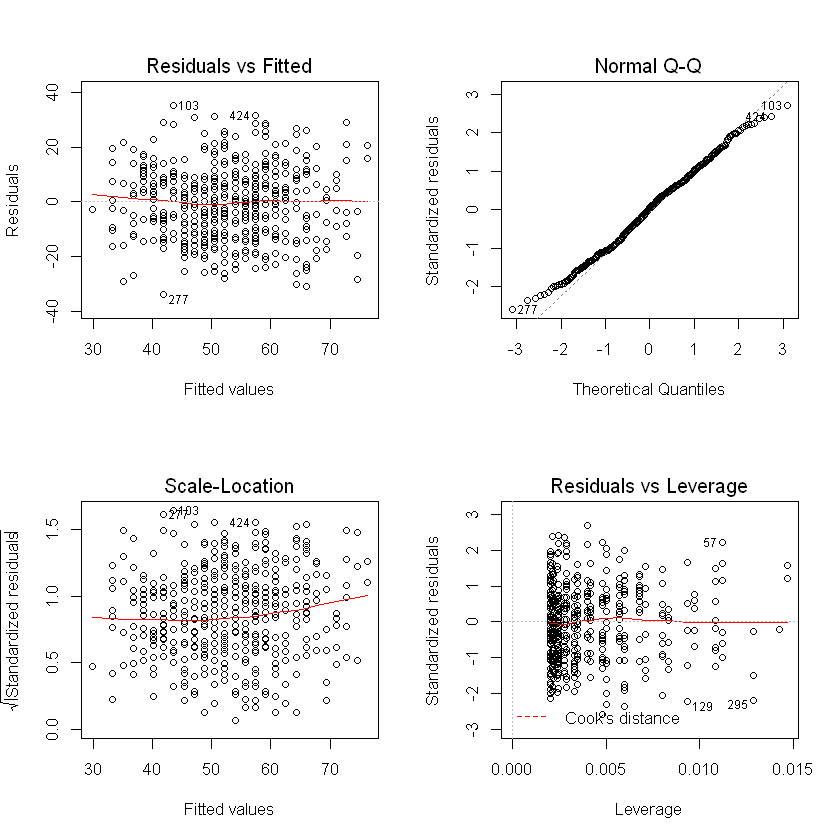

In [27]:
par(mfrow=c(2,2))
plot(m1)

1. The first plot (in the upper left corner) shows the fitted values versus residuals for $m1$. There is no obvious pattern between the fitted values for overall satisfaction and the residuals; this is consistent with the idea that **the residuals are due to random error**, and supports the notion that the model is adequate.
2. The second plot in the lower left of figure is similar to the first, except that instead of plotting the raw residual value, it plots the square root of the standardized residual. Again, there should be no clear pattern; if there were it might indicate a nonlinear relationship. Observations with high residuals are flagged as potential outliers, and R labels them with row numbers in case we wish to inspect them in the data frame. A common pattern in residual plots is a **cone or funnel**, where the range of errors gets progressively **larger for larger fitted values**. This is called **heteroskedasticity** and is a violation of linear model assumptions. Sometimes a transformation of the predictor or outcome variable will resolve heteroskedasticity.
3. The third result of *plot()* for *lm* objects is a *Normal QQ plot*. A QQ plot helps you see whether the **residuals follow a normal distribution**, another key assumption. It compares the values that residuals would be expected to take if they are normally distributed, versus their actual values. When the model is appropriate, these points are similar and fall close to a diagonal line; when the relationship between the variables is nonlinear or otherwise does not match the assumption, the points deviate from the diagonal line. In the present case, the QQ plot suggests that the data fits the assumption of the model.
4. The final plot in the lower right panel of figure again helps to **identify potential outliers**, observations that may come from a different distribution than the others. Outliers are a problem because, if they are far from other points, they unduly influence the fitted line. We do not want one or a very few observations to have a large effect on the coefficients. The lower right plot plots the leverage of each point, a measure of how much influence the point has on the model coefficients. When a point has a high residual and high leverage,b**it indicates that the point has both a different pattern (residual) and undue influence (leverage)**. One measure of the leverage of a data point is Cook’s distance, an estimate of how much predicted (y) values would change if the model were re-estimated with that point eliminated from the data. If you have observations with **high Cook’s distance, this chart would show dotted lines for the distances**; in the present case, there are none. Still, in the lower right of figure, three points are automatically labeled with row numbers because they are potentially problematic outliers based on high standardized residual distance and leverage on the model.


## Dealing with Outliers


I do not recommend routinely remove outliers yet I do recommend to inspect them and determine whether
there is a problem with the data. Let inspect the identified points by selecting those
rows:

In [28]:
df[c(57, 129, 295),]

,weekend,num.child,distance,rides,games,wait,clean,overall,logdist
57,yes,2,63.29248,92,83,93,98,102,4.147767
129,yes,0,11.89550,70,72,54,74,6,2.476161
295,no,0,11.74474,93,78,67,89,46,2.463406


In this case, none of the data points is obviously invalid (for instance, with values below
1 or greater than 100). Overall, figure looks good and suggests that the model relating overall satisfaction
to satisfaction with rides is reasonable.

Now that we’ve covered the basics of linear models using just one predictor, we
turn to the problem of assessing multiple drivers of satisfaction. Our goal is to sort
through all of the features of the park—rides, games, wait times, and cleanliness—to
determine which ones are most closely related to overall satisfaction.

## Including Variables

In [29]:
m2 <- lm(overall ∼ rides + games + wait + clean, data=df)
summary(m2)


Call:
lm(formula = overall ~ rides + games + wait + clean, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.101  -7.266   1.274   7.582  28.695 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -125.16246    8.26476 -15.144  < 2e-16 ***
rides          0.53948    0.14753   3.657 0.000283 ***
games          0.16085    0.07115   2.261 0.024218 *  
wait           0.55497    0.04936  11.244  < 2e-16 ***
clean          0.96028    0.16394   5.858 8.57e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.92 on 495 degrees of freedom
Multiple R-squared:  0.5427,	Adjusted R-squared:  0.539 
F-statistic: 146.8 on 4 and 495 DF,  p-value: < 2.2e-16


The R-squared increased to 0.5586, meaning that about half of the variation in overall
ratings is explained by the ratings for specific features. The residual standard error
is now 10.59, meaning that the predictions are more accurate. Our residuals also
appear to be symmetric.

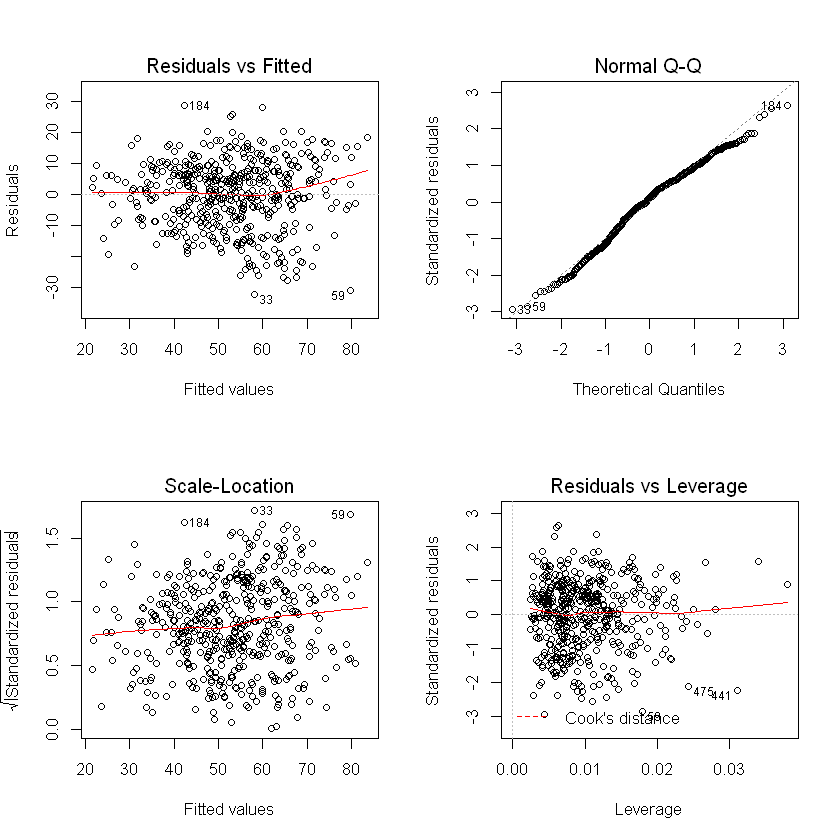

In [30]:
par(mfrow=c(2,2))
plot(m2)

Next we examine the model coefficients. Each coefficient represents the strength
of the relationship between satisfaction with that feature and overall satisfaction,
conditional on the values of the other predictors. All four features are identified
as being statistically significant.

Warning message:
"Ignoring unknown aesthetics: xmin, xmax"

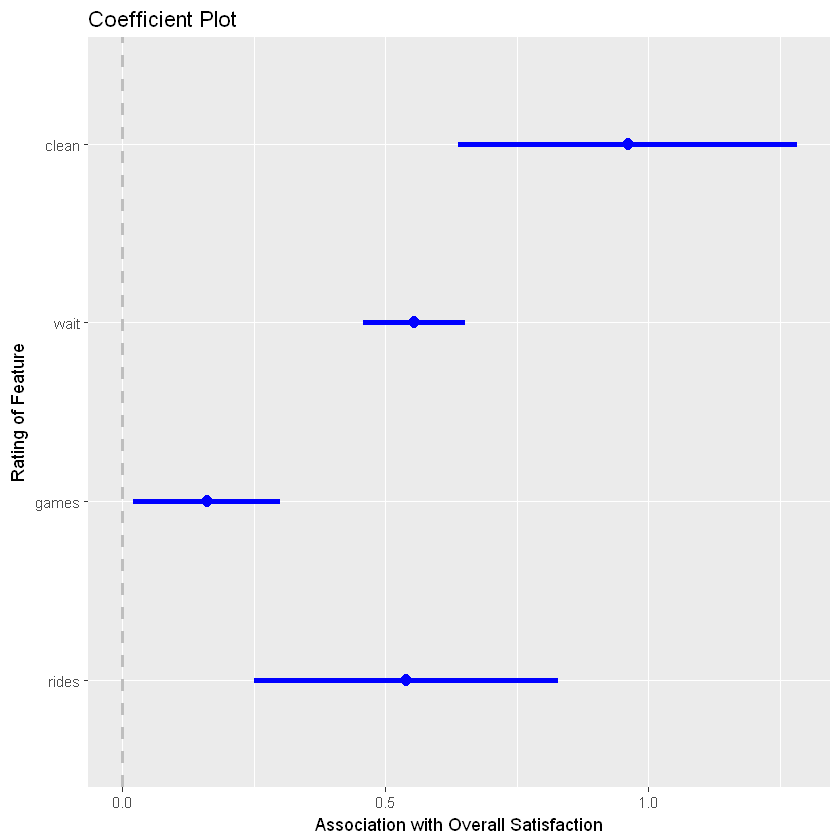

In [31]:
coefplot(m2, intercept=FALSE, outerCI=1.96, lwdOuter=1.5, ylab="Rating of Feature",xlab="Association with Overall Satisfaction")

We use coefplot() arguments to set the outer confidence interval to a width
of 1.96 standard errors (using outerCI=1.96, which corresponds to a 95%
confidence interval) and to increase the size of the plotted lines slightly with
lwdOuter=1.5.
<br>The result is shown in Figure, where we see that **satisfaction with cleanliness is estimated
to be the most important feature** associated with overall satisfaction, followed
by satisfaction with the rides and wait times. Satisfaction with games is estimated
to be relatively less important.
<br>A plot of coefficients is often a key output from a satisfaction drivers analysis. Sorting
the plot so that the coefficients are in order based on their estimated coefficient
may make it easier to quickly identify the features that are most closely related to
overall satisfaction if you have a large number of predictors.

Now that we have two model objects, m1 and m2 we might ask which one is better.
One way to evaluate models is to compare their R-squared values.

In [32]:
summary(m1)$adj.r.squared
summary(m2)$adj.r.squared


[1] 0.3324305

[1] 0.5389668

and AIC criterion, which is given by:
$$AIC = -2\log L + k \times edf ,$$
where $L$ is likelihood function (in our case based on normal distribution) and $edf$ is the number of free parameters for regression model. In OLS it is equal number of independent variables. 

In [33]:
extractAIC(m1,k=2)
extractAIC(m2,k=2)

[1]    2.000 2577.288

[1]    5.00 2395.18

To compare the predictions of the models visually, we plot the fitted versus actual
values for each:

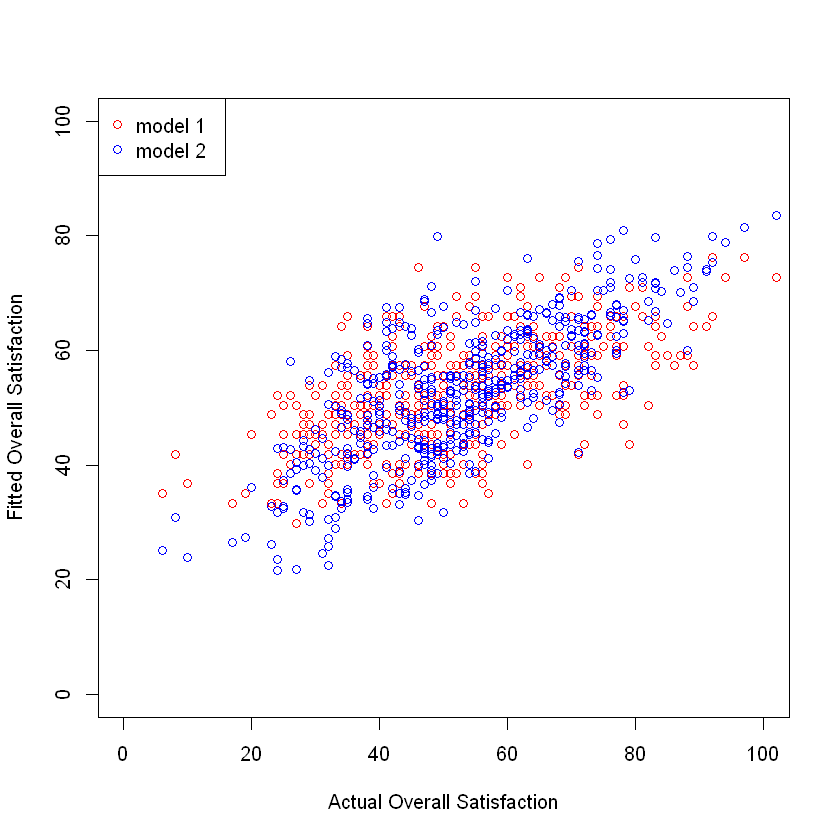

In [34]:
plot(df$overall, fitted(m1), col="red",xlim=c(0,100), ylim=c(0,100), xlab="Actual Overall Satisfaction", ylab="Fitted Overall Satisfaction")
points(df$overall, fitted(m2), col="blue")
legend("topleft", legend=c("model 1", "model 2"),col=c("red", "blue"), pch=1)

If the model fits the data perfectly, it would **fall along a 45◦ line in this plot**, but, of
course, it is nearly impossible to fit customer satisfaction data perfectly. By comparing
the red and the blue points in the resulting plot in figure, you can see that
the **blue cloud of points is more tightly clustered along a diagonal line**, which shows
that m2 explains more of the variation in the data than m1.

# Comparing Nested Models

For a more formal test, which is possible because the models here are nested.
 We can use anova() function to determine whether m2 explains more
of the variation than m1:

In [35]:
anova(m1, m2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
498,85921.11,NA,NA,NA,NA
495,58980.91,3,26940.2,75.36562,3.641831e-40


The low p-value indicates that the additional predictors in m2 significantly improve
the fit of the model. If these two models were the only ones under consideration, we
would interpret m2 instead of m1.

Thus far, we have interpreted raw coefficients in order to evaluate the contributions
of ratings on the shared 100-point scale. However, if the variables have different
scales, such as a survey where rides is rated on a 1–10 scale while cleanliness is
rated 1–5 scale, then their coefficient values would not be directly comparable. In
the present data, this occurs with the distance and logdist variables, which
are not on a 100-point scale.
<br>
<br>When you wish to **compare coefficients, it can be helpful to standardize data on a
common scale before fitting a model** (and after transforming any variables to a more
normal scale). The most common standardization converts values to zero-centered
units of standard deviation. This subtracts a variable’s mean from each observation
and then divides by the standard deviation (sd()). This could be done by:

In [36]:
df.std <- df[ , -3] # sat but remove distance
df.std[ , 3:8] <- scale(df.std[ , 3:8])

In [37]:
head(df.std)

weekend,num.child,rides,games,wait,clean,overall,logdist
yes,0,0.2987971,-0.7561865,-0.87575676,0.1184417,-0.2408509,1.7886823
yes,2,0.2987971,-0.1408004,0.61236008,-0.2711692,0.9410106,0.3226360
no,1,-0.2552148,0.1053541,0.05431626,0.1184417,0.5677911,1.1862757
yes,0,0.2987971,-0.7561865,-0.41072025,0.3132472,-0.9250865,0.2803106
no,4,-0.4398855,1.0899720,0.42634547,-0.2711692,1.0032138,1.0385034
no,5,-0.8092268,0.1053541,-2.08485169,-1.6348075,-1.4849157,0.1452467


## Model 3

For the next step, we wonder whether satisfaction is different for customers who
come on the weekend, travel farther, or have more children.We add these predictors
to the model using the standardized data:

In [38]:
m3 <- lm(overall ∼ rides + games + wait + clean + weekend + logdist + num.child, data = df.std)
summary(m3)


Call:
lm(formula = overall ~ rides + games + wait + clean + weekend + 
    logdist + num.child, data = df.std)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.60258 -0.39978  0.02281  0.41053  1.70036 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.39447    0.04675  -8.438 3.63e-16 ***
rides        0.20641    0.04210   4.903 1.29e-06 ***
games        0.07134    0.03041   2.346   0.0194 *  
wait         0.37871    0.02792  13.566  < 2e-16 ***
clean        0.29033    0.04431   6.553 1.43e-10 ***
weekendyes  -0.04370    0.05167  -0.846   0.3981    
logdist      0.06557    0.02585   2.537   0.0115 *  
num.child    0.23909    0.01720  13.904  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5739 on 492 degrees of freedom
Multiple R-squared:  0.6752,	Adjusted R-squared:  0.6706 
F-statistic: 146.1 on 7 and 492 DF,  p-value: < 2.2e-16


When your data **includes factors**, you must be careful about the data type. For example,
*num.child* is a numeric variable, ranging 0–5, but it doesn’t necessarily
make sense to treat it as a number, as we did in m3. 
<br>
<br>In doing so, we **implicitly assume
that satisfaction goes up or down linearly as a function of the number of children**,
and that the effect is the same for each additional child. (Anyone who has taken a
group of children to an amusement park might guess that this is an unreasonable
assumption.)
We correct this by converting *num.child* to a **factor** and re-estimating the
model:

In [39]:
df.std$num.child.factor <- factor(df.std$num.child)

In [40]:
m4 <- lm(overall ∼ rides + games + wait + clean + weekend + logdist + num.child.factor, data=df.std)
summary(m4)


Call:
lm(formula = overall ~ rides + games + wait + clean + weekend + 
    logdist + num.child.factor, data = df.std)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.25150 -0.32994 -0.00513  0.31409  1.44218 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.72670    0.04437 -16.378  < 2e-16 ***
rides              0.22188    0.03496   6.347 5.01e-10 ***
games              0.04299    0.02521   1.705   0.0888 .  
wait               0.38241    0.02312  16.537  < 2e-16 ***
clean              0.29755    0.03675   8.097 4.52e-15 ***
weekendyes        -0.01880    0.04273  -0.440   0.6602    
logdist            0.03154    0.02148   1.468   0.1426    
num.child.factor1  1.06124    0.07049  15.056  < 2e-16 ***
num.child.factor2  1.08519    0.05575  19.465  < 2e-16 ***
num.child.factor3  1.03091    0.06946  14.841  < 2e-16 ***
num.child.factor4  0.98893    0.07943  12.450  < 2e-16 ***
num.child.factor5  1.04293    0.10253  10.172  < 2e-16

A striking thing about m4 is that **the increase in overall satisfaction is about the
same regardless of how many children there are** in the party—about one standard
deviation higher for any number of children. This suggests that we don’t actually
need to estimate a different increase for each number of children. In fact, if the
increase is the same for one child as for five children, attempting to fit a model that
scales increasingly per child would result in a less accurate estimate.
<br>
<br>Instead, we declare a new variable called *has.child* that is TRUE when the party
has children in it and FALSE when the party does not have children. We then
estimate the model using that new factor variable. 
<br>
<br>**We also drop weekend from the
model because it doesn’t seem to be a significant predictor**:

In [41]:
df.std$has.child <- factor(df.std$num.child > 0)
m5 <- lm(overall ∼ rides + games + wait + clean + logdist + has.child,data=df.std)
summary(m5)


Call:
lm(formula = overall ~ rides + games + wait + clean + logdist + 
    has.child, data = df.std)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.26183 -0.33269 -0.00197  0.32233  1.43605 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.73590    0.03861 -19.058  < 2e-16 ***
rides          0.22082    0.03466   6.370 4.33e-10 ***
games          0.04424    0.02509   1.763   0.0785 .  
wait           0.38335    0.02299  16.674  < 2e-16 ***
clean          0.29785    0.03648   8.164 2.73e-15 ***
logdist        0.03443    0.02124   1.621   0.1056    
has.childTRUE  1.05429    0.04629  22.774  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4727 on 493 degrees of freedom
Multiple R-squared:  0.7792,	Adjusted R-squared:  0.7765 
F-statistic:   290 on 6 and 493 DF,  p-value: < 2.2e-16


We can include an interaction of two terms by using the **: **operator between variables
in a formula.
<br>
<br> For instance, to estimate overall as a function of rides plus
the interaction of wait and has.child, we could write the formula as overall
*∼ rides + wait:no.child*.

In [42]:
m6 <- lm(overall ∼ rides + games + wait + clean + weekend + logdist + has.child + rides:has.child + 
         games:has.child + wait:has.child + clean:has.child + rides:weekend + games:weekend 
+ wait:weekend + clean:weekend, data=df.std)


In [43]:
summary(m6)


Call:
lm(formula = overall ~ rides + games + wait + clean + weekend + 
    logdist + has.child + rides:has.child + games:has.child + 
    wait:has.child + clean:has.child + rides:weekend + games:weekend + 
    wait:weekend + clean:weekend, data = df.std)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.20612 -0.29683  0.00697  0.30788  1.45325 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -0.714619   0.042563 -16.790  < 2e-16 ***
rides                0.146551   0.067344   2.176 0.030026 *  
games                0.073642   0.048821   1.508 0.132103    
wait                 0.132772   0.043923   3.023 0.002637 ** 
clean                0.304566   0.078835   3.863 0.000127 ***
weekendyes          -0.015968   0.040826  -0.391 0.695880    
logdist              0.026443   0.020480   1.291 0.197261    
has.childTRUE        1.044456   0.044397  23.525  < 2e-16 ***
rides:has.childTRUE  0.054988   0.072208   0.762 0.446719    
games

The model object m6 now includes eight interaction terms between ratings for features
of the park and no.child and weekend. Only **one of these interactions
is significant: the wait:no.child interaction**.
<br>
<br>This suggests we could drop the
non-significant interactions to create a new model m7:

In [44]:
m7 <- lm(overall ∼ rides + games + wait + clean + logdist + has.child + wait:has.child, data=df.std)
summary(m7)


Call:
lm(formula = overall ~ rides + games + wait + clean + logdist + 
    has.child + wait:has.child, data = df.std)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.18731 -0.30473 -0.00076  0.32601  1.41957 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.72769    0.03647 -19.952  < 2e-16 ***
rides               0.21439    0.03274   6.549 1.46e-10 ***
games               0.04875    0.02370   2.057   0.0402 *  
wait                0.15182    0.03674   4.133 4.21e-05 ***
clean               0.28936    0.03446   8.396 4.96e-16 ***
logdist             0.02890    0.02006   1.440   0.1504    
has.childTRUE       1.04753    0.04372  23.962  < 2e-16 ***
wait:has.childTRUE  0.33970    0.04348   7.813 3.42e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4463 on 492 degrees of freedom
Multiple R-squared:  0.8036,	Adjusted R-squared:  0.8008 
F-statistic: 287.6 on 7 and 492 DF,  p

In these results, we see that **attending the park with children is a predictor of higher
satisfaction, and waiting time is more important predictor among those with children (wait:has.childTRUE) than those without children.** We don’t know the reason
for this, but perhaps children go on more rides and their parents are therefore more
influenced by wait times.


One might further tune the model by considering whether logdist is still needed;
I’ll leave that you to verify that and assume that **model m7 is the final model**.

### What to do with results? 
What do we do with these results as marketers? We identify several possible marketing
interventions. 
1. If we want to increase satisfaction overall, we could perhaps do so by trying to increase the number of visitors with children. 
2. Alternatively, if we want to appeal to visitors without children, we might engage in further research to understand why their ratings are lower. 
3. If we are allocating budget to personnel, the importance of cleanliness suggests continuing to allocate resources there (as opposed, say, to games).
4. We might also want to learn more about the association between children and waiting time, and whether there are things we could do to make waiting less frequent or more enjoyable.


There are many more such questions one could pose from results like these; **a crucial
step in analysis is to think carefully about the implications and where one might
be able to make a product or market intervention**. 


**Important** to remember that the model assesses **association, not causation**.
Possible changes in outcome should be viewed as hypotheses suggested by
the model, to be confirmed separately.

Warning message:
"Ignoring unknown aesthetics: xmin, xmax"

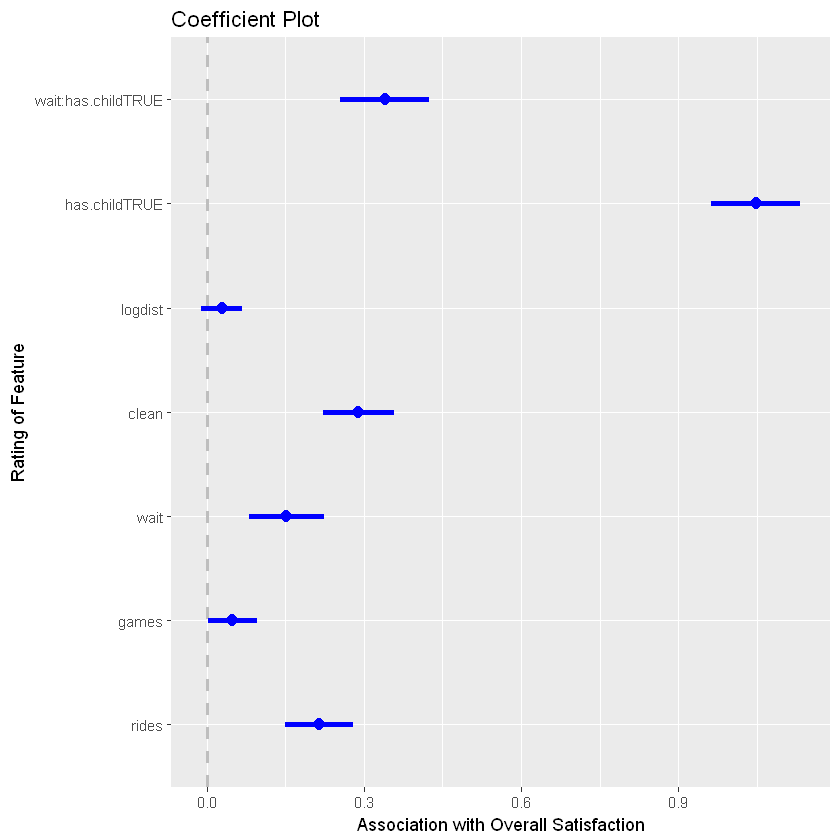

In [45]:
coefplot(m7, intercept=FALSE, outerCI=1.96, lwdOuter=1.5,ylab="Rating of Feature",xlab="Association with Overall Satisfaction")

# Marginal Plot
Marginal Plots provide cool way to validate the functional form of the features.

Warning message in mmps(m7, layout = c(2, 3)):
"Interactions and/or factors skipped"

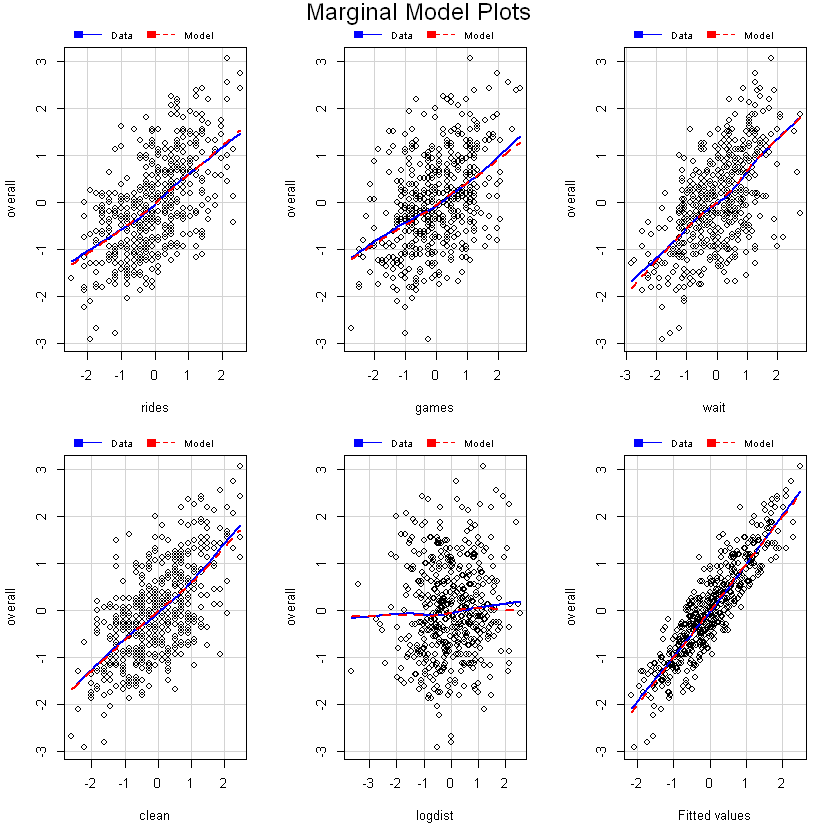

In [46]:
mmps(m7,layout=c(2,3))

# Inverse Response Plot

Warning message:
"'inverse.response.plot' is deprecated.
Use 'inverseResponsePlot' instead.
See help("Deprecated") and help("alr3-deprecated")."

lambda,RSS
1.037404,28676.85
-1.000000,35249.13
0.000000,29794.01
1.000000,28677.74


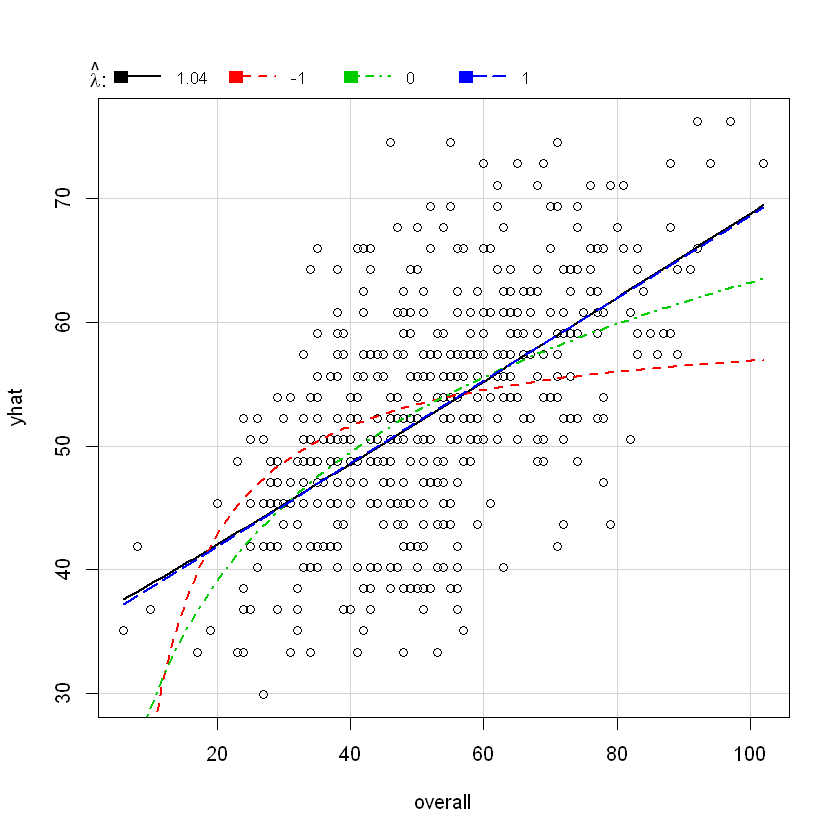

In [47]:
par(mfrow=c(1,1))
inverse.response.plot(m1,key=TRUE)


In [48]:
#Model=1
n <- length(m1$residuals)
npar <- length(m1$coefficients) +1
#Calculate adjusted R_Square
R_sq_m1<-summary(m1)$adj.r.squared
#Calculate AICc
AIC_m1<-extractAIC(m1,k=2)+2*npar*(npar+1)/(n-npar-1)
#Calculate BIC
BIC_m1<-extractAIC(m1,k=log(n))
#Model=2
npar <- length(m2$coefficients) +1
#Calculate adjusted R_Square
R_sq_m2<-summary(m2)$adj.r.squared
#Calculate AICc
AIC_m2<-extractAIC(m2,k=2)+2*npar*(npar+1)/(n-npar-1)
#Calculate BIC
BIC_m2<-extractAIC(m2,k=log(n))
#Model=5
npar <- length(m5$coefficients) +1
#Calculate adjusted R_Square
R_sq_m5<-summary(m5)$adj.r.squared
#Calculate AICc
AIC_m5<-extractAIC(m5,k=2)+2*npar*(npar+1)/(n-npar-1)
#Calculate BIC
BIC_m5<-extractAIC(m5,k=log(n))
#Model=6
npar <- length(m6$coefficients) +1
#Calculate adjusted R_Square
R_sq_m6<-summary(m6)$adj.r.squared
#Calculate AICc
AIC_m6<-extractAIC(m6,k=2)+2*npar*(npar+1)/(n-npar-1)
#Calculate BIC
BIC_m6<-extractAIC(m6,k=log(n))
#Model=6
npar <- length(m7$coefficients) +1
#Calculate adjusted R_Square
R_sq_m7<-summary(m7)$adj.r.squared
#Calculate AICc
AIC_m7<-extractAIC(m7,k=2)+2*npar*(npar+1)/(n-npar-1)
#Calculate BIC
BIC_m7<-extractAIC(m7,k=log(n))

In [49]:
R_square<-cbind(R_sq_m1,R_sq_m2,R_sq_m5,R_sq_m6,R_sq_m7)
AIC<-cbind(AIC_m1[2],AIC_m2[2],AIC_m5[2],AIC_m6[2],AIC_m7[2])
BIC<-cbind(BIC_m1[2],BIC_m2[2],BIC_m5[2],BIC_m6[2],BIC_m7[2])
table<-rbind(R_square,AIC,BIC)


In [50]:
table

R_sq_m1,R_sq_m2,R_sq_m5,R_sq_m6,R_sq_m7
0.3324305,0.5389668,0.7765439,0.799596,0.8008016
2577.3367342,2395.3508756,-742.0264129,-786.701850,-798.4242080
2585.7175633,2416.2535307,-712.8174352,-720.537830,-765.0746901


## Measuring the quality of fit

Suppose now you want to choose the model based on the measure how good is your model predicting. In the regression setting, the most commonly-use measure is the **mean squared error**(MSE), given by 
$$MSE = \frac{1}{n}\sum_{i=1}^n(y_i - \hat f(x_i))^2,$$
where $\hat f(x_i)$ is the prediction that $hat f$ gives for the $i$th observation. The MSE will be small if the predicted responses are very close to the true responses and vice versa. 

**Important** If you compute estimate to previously seen data set (**training data**), then it should be comparably small. But in general, we do not really care how well the method works on the training data. Rather, *we are interested in the accuracy of the predictions that we obtain when we apply out method to previously unseen test data*. When your dataset is small and you do not have luxury to divide your data into two parts. One of the recommended method is $K-$fold crossvalidation

### Cross Validation
In this case we randomly divide the set of observations into $k$ groups, or folds, of approximately equal size. Tje first fold is treated as a validation set, and the method is fit on the remaining $k-1$ folds. The $MSE_1$ is them computed on the observations in the held-out fold. This procedure is repeated $k$ times; each time, a different group of observations is treated as a validation set. This process results in $k$ estimates of the error, $MSE_1,MSE_2,\dots,MSE_k$. The $k-$fold CV is computed by averaging values,
$$CV_{(k)}=\frac{1}{k}\sum_{i=1}^k MSE_i$$


In [51]:
dim(df)
MSE_m5<-deviance(m5)/nobs(m5)
print(MSE_m5)
MSE_m6<-deviance(m6)/nobs(m6)
print(MSE_m6)
MSE_m7<-deviance(m7)/nobs(m7)
print(MSE_m7)

[1] 500   9

[1] 0.2203277
[1] 0.1939911
[1] 0.1960113


In [68]:
cvlm<-function(n_folds=5,model,df)
    {
    data<-df
    K<-n_folds
    model<-model
    form<-formula(model)
    formtxt <- deparse(form)
    mf <- model.frame(form, data = data)
    ynam <- attr(mf, "names")[attr(attr(mf, "terms"), "response")]
    n_fold<-5
    sum.sq<-numeric(n_fold)
    fold_i <-rep(1:n_fold,length.out=dim(data)[1])
    for ( i in 1:n_fold)
    {
      test_i <-which(fold_i==i)
      n<-length(test_i)[1]  
      test<-data[test_i,]
      train<-data[-test_i,]
      test_x<-mf[test_i,]
      model_i<-lm(form,data=train)
      sum.sq[i]<-sum((test$overall-predict(model_i,newdata=test_x))^2)/n
     }
    SSE<-sum.sq
    MSE<-sum(sum.sq)/K
    return<-list("MSE"=MSE,"SSE"=SSE)
    return(return)
    }

In [69]:
MSE.m5<-cvlm(5,m5,df.std)$MSE
MSE.m6<-cvlm(5,m6,df.std)$MSE
MSE.m7<-cvlm(5,m7,df.std)$MSE
c(MSE.m5,MSE.m6,MSE.m7)

[1] 0.2267831 0.2072198 0.2024446

In [70]:
SSE.m5<-cvlm(5,m5,df.std)$SSE
SSE.m6<-cvlm(5,m6,df.std)$SSE
SSE.m7<-cvlm(5,m7,df.std)$SSE

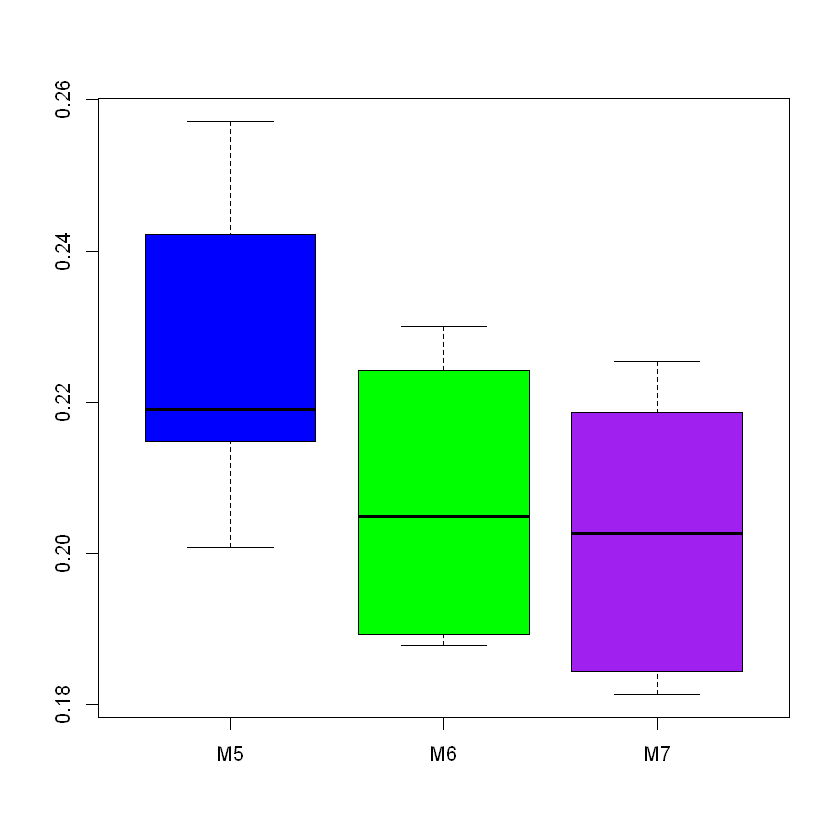

In [72]:
boxplot(SSE.m5,SSE.m6,SSE.m7,names=c("M5","M6","M7"),col=c("blue","green","purple"))

## Recommended Procedure for Linear Model Fitting
We followed a lengthy process to arrive at the final model m7, and it is helpful to
recount the general steps we recommend in creating such a linear model.
    1. Inspect the data to make sure it is clean and has the structure you expect.
    2. Check the distributions of the variables to make sure they are not highly skewed
     If one is skewed, consider transforming it.
    3. Examine the bivariate scatterplots and correlation matrix to see
    whether there are any extremely correlated variables (such as r > 0.9, or several
    with r > 0.8). If so, omit some variables or consider transforming them if
    needed.
    4. If you wish to estimate coefficients on a consistent scale, standardize the data
    with scale() (Sect. 7.3.3).
    5. After fitting a model, check the residual quantiles in the output. The residuals
    show how well the model accounts for the individual observations (Sect. 7.2.4).
    6. Check the standard model plots using plot(), which will help you judge
    whether a linear model is appropriate or whether there is nonlinearity, and will
    identify potential outliers in the data (Sect. 7.2.4).
    7. Try several models and compare them for overall interpretability and model fit
    by inspecting the residuals’ spread and overall R2 (Sect. 7.3.1). If the models
    are nested, you could also use anova() for comparison (Sect. 6.5.1) .
    8. Report the confidence intervals of the estimates with your interpretation and
    recommendations (Sect. 7.3).